In [ ]:
from collections import defaultdict

positiveValues=defaultdict(int)

In [ ]:
for text in data:
    for word in unigrams:
        positiveValues[word]+=1

In [ ]:
df_positive = sorted(positiveValues.items(),key=lambda x:x[1],reverse=True)

In [ ]:
df_positive = pd.DataFrame(df_positive)

In [ ]:
df_positive.head(10)

,0,1
0,के,105480
1,में,61001
2,है,54172
3,और,50067
4,की,49633
5,को,33475
6,से,33338
7,का,29104
8,लिए,21487
9,हैं,19799


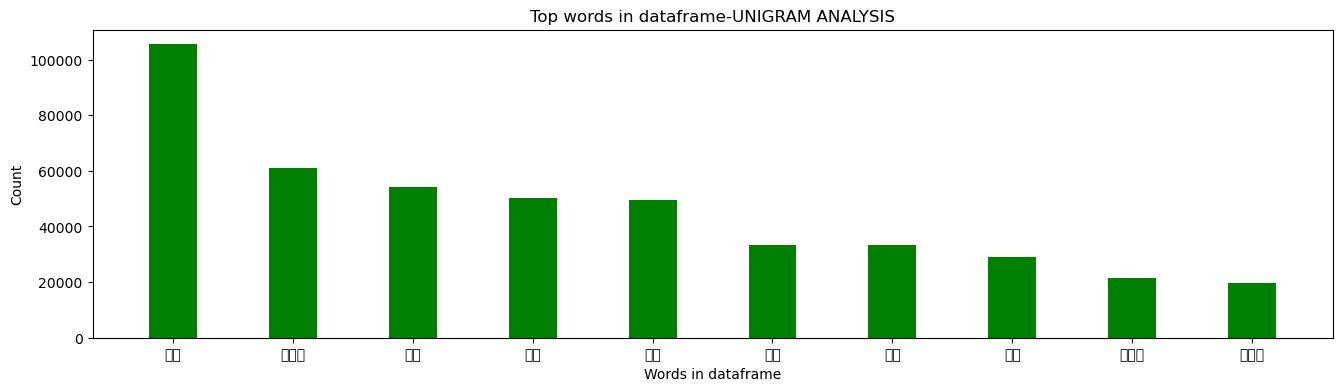

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(df_positive[0][:10],df_positive[1][:10], color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top words in dataframe-UNIGRAM ANALYSIS")
plt.show()

In [ ]:
train_size = int(len(unigrams_df) * 0.7)
test_size = int(len(unigrams_df) * 0.3) 
train = unigrams_df[test_size:len(unigrams_df)]
test = unigrams_df[train_size:len(unigrams_df)]
print(len(train), len(test))

1350874 578946


In [ ]:
training_set = train.iloc[:].values

In [ ]:
training_set

array([['प्रमुख'],
       ['है'],
       ['और'],
       ...,
       ['आश्वासन'],
       ['देता'],
       ['हूं']], dtype=object)

In [ ]:
training_set = train.iloc[:].values
X_train = []
y_train = []
for i in range(5000, training_set.shape[0]):
    X_train.append(training_set[i-5000:i,0])
    y_train.append(training_set[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([['प्रमुख', 'है', 'और', ..., 'में', 'कार्यरत', 'है'],
       ['है', 'और', 'एएस', ..., 'कार्यरत', 'है', 'और'],
       ['और', 'एएस', 'एवं', ..., 'है', 'और', 'पर्यटकों'],
       ...,
       ['यंत्र', 'को', 'बाएँ', ..., 'हरसंभव', 'सहयोग', 'का'],
       ['को', 'बाएँ', 'हाथ', ..., 'सहयोग', 'का', 'आश्वासन'],
       ['बाएँ', 'हाथ', 'के', ..., 'का', 'आश्वासन', 'देता']], dtype=object)

In [ ]:
y_train

array(['और', 'पर्यटकों', 'को', ..., 'आश्वासन', 'देता', 'हूं'],
      dtype='<U44')

In [ ]:
X_train.shape

(1345874, 5000)

In [ ]:
y_train.shape

(1345874,)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1345874, 5000)
(1345874,)


In [ ]:
testing_set = test.iloc[:].values
X_test = []
y_test = []
for i in range(5000, testing_set.shape[0]):
    X_test.append(testing_set[i-5000:i,0])
    y_test.append(testing_set[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(573946, 5000)
(573946,)


In [ ]:
tk = Tokenizer(lower=False)
tk.fit_on_texts(y_train)
from keras.utils import pad_sequences

x_train_tok = tk.texts_to_sequences(X_train[0])
x_test_tok = tk.texts_to_sequences(X_test[0])
y_train_tok = tk.texts_to_sequences(y_train[:5000])
y_test_tok = tk.texts_to_sequences(y_test[:5000])

max_len = 100
x_train_pad = pad_sequences(x_train_tok, maxlen=max_len)
x_test_pad = pad_sequences(x_test_tok, maxlen=max_len)
y_train_pad = pad_sequences(y_train_tok, maxlen=max_len)
y_test_pad = pad_sequences(y_test_tok, maxlen=max_len)

In [ ]:
x_train_pad.shape

(5000, 10)

In [ ]:
y_train_pad.shape

(5000, 100)